In [9]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

#Carregar e preparar os dados. Carregar o dataset Iris:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Vamos adicionar artificialmente uma coluna altamente correlacionada para fins de demonstração
df['highly_correlated'] = df['sepal length (cm)'] * 0.95 + np.random.rand(len(df)) * 0.05


In [10]:
# Calcular a matriz de correlação
corr_matrix = df.corr().abs()

# Exibir a matriz de correlação
print(corr_matrix)


                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.117570           0.871754   
sepal width (cm)            0.117570          1.000000           0.428440   
petal length (cm)           0.871754          0.428440           1.000000   
petal width (cm)            0.817941          0.366126           0.962865   
highly_correlated           0.999841          0.116784           0.871559   

                   petal width (cm)  highly_correlated  
sepal length (cm)          0.817941           0.999841  
sepal width (cm)           0.366126           0.116784  
petal length (cm)          0.962865           0.871559  
petal width (cm)           1.000000           0.817498  
highly_correlated          0.817498           1.000000  


<Axes: >

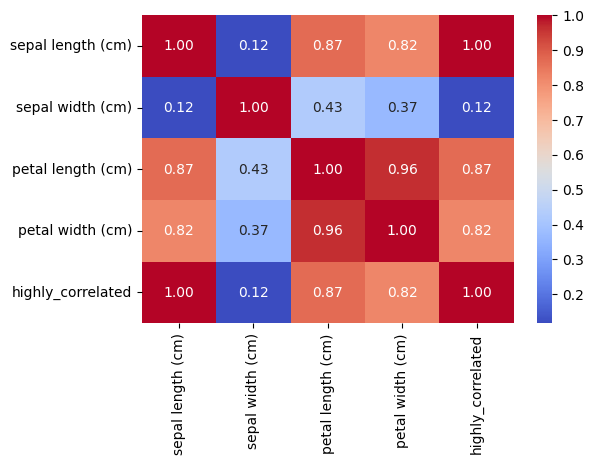

In [12]:
# Criar o heatmap usando seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [5]:
# Definir o threshold de correlação
threshold = 0.9

# Criar uma lista para armazenar colunas que serão removidas
to_drop = set()

# Iterar sobre a matriz de correlação
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)

# Remover colunas altamente correlacionadas
df_filtered = df.drop(columns=to_drop)

In [7]:
print(f"Atributos removidos: {to_drop}")
print(f"Atributos restantes: {df_filtered.columns.tolist()}")

Atributos removidos: {'highly_correlated', 'petal width (cm)'}
Atributos restantes: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']


<Axes: >

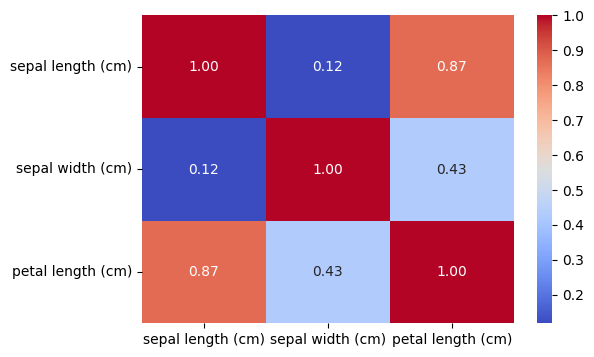

In [17]:
# Calcular a nova matriz de correlação após a filtragem
corr_matrix_filtered = df_filtered.corr().abs()

# Criar o heatmap usando seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f")
